In [ ]:
import pandas as pd

In [ ]:
uscon_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/complaints.csv')

In [ ]:
uscon_df.shape

(10231748, 18)

In [ ]:
uscon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231748 entries, 0 to 10231747
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.

In [ ]:
uscon_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NC,28206,NaN,Consent not provided,Web,2020-03-14,Closed with explanation,Yes,NaN,3567184
1,2020-05-05,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,WI,53714,NaN,Consent not provided,Web,2020-05-05,Closed with explanation,Yes,NaN,3637115
2,2019-07-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,usc section 1681 states that there must be wri...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,31210,NaN,Consent provided,Web,2019-07-19,Closed with explanation,Yes,NaN,3311892
3,2019-04-02,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,NaN,NaN,JPMORGAN CHASE & CO.,GA,30088,NaN,Consent not provided,Web,2019-04-02,Closed with monetary relief,Yes,NaN,3199330
4,2020-07-20,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,PNC Bank will not allow me to link my accounts...,NaN,PNC Bank N.A.,NJ,08043,NaN,Consent provided,Web,2020-07-20,Closed with explanation,Yes,NaN,3754536


In [ ]:
min_date = uscon_df['Date received'].min()
max_date = uscon_df['Date received'].max()

print(f"Minimum Date received: {min_date}")
print(f"Maximum Date received: {max_date}")

Minimum Date received: 2011-12-01
Maximum Date received: 2025-08-01


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# from datetime import datetime, timedelta

# # Convert 'Date received' to datetime objects
# uscon_df['Date received'] = pd.to_datetime(uscon_df['Date received'])

# # Calculate the date 3 years ago from the maximum date in the dataset
# three_years_ago = uscon_df['Date received'].max() - timedelta(days=3*365)

# # Filter for the last 3 years and non-null 'Consumer complaint narrative'
# filtered_df = uscon_df[(uscon_df['Date received'] >= three_years_ago) & (uscon_df['Consumer complaint narrative'].notna())].copy()

# # Display the shape of the filtered DataFrame
# print(f"Shape of the filtered DataFrame: {filtered_df.shape}")

# # Display the head of the filtered DataFrame
# display(filtered_df.head())

In [ ]:
# filtered_df.shape

In [ ]:
from datetime import datetime, timedelta

# Convert 'Date received' to datetime objects if not already done
uscon_df['Date received'] = pd.to_datetime(uscon_df['Date received'])

# Calculate the date 2 years ago from the maximum date in the dataset
two_years_ago = uscon_df['Date received'].max() - timedelta(days=2*365)

# Filter for the last 2 years and non-null 'Consumer complaint narrative', 'Product', and 'Sub-product'
filtered_df_2years = uscon_df[
    (uscon_df['Date received'] >= two_years_ago) &
    (uscon_df['Consumer complaint narrative'].notna()) &
    (uscon_df['Product'].notna()) &
    (uscon_df['Sub-product'].notna())
].copy()

# Display the shape of the filtered DataFrame
print(f"Shape of the filtered DataFrame (last 2 years, non-null narratives, product, and sub-product): {filtered_df_2years.shape}")

# Display the head of the filtered DataFrame
display(filtered_df_2years.head())

Shape of the filtered DataFrame (last 2 years, non-null narratives, product, and sub-product): (1627852, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
54,2024-05-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78702,NaN,Consent provided,Web,2024-05-07,Closed with non-monetary relief,Yes,NaN,8953689
62,2024-04-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,2024-04-03,Closed with non-monetary relief,Yes,NaN,8690404
98,2024-04-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"Dear Consumer Financial Protection Bureau, I a...",NaN,JPMORGAN CHASE & CO.,TX,75063,NaN,Consent provided,Web,2024-04-28,Closed with explanation,Yes,NaN,8876207
226,2024-03-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"On XX/XX/XXXX, I submitted an online dispute t...",NaN,"Sensible Auto Lending, LLC",AR,XXXXX,Servicemember,Consent provided,Web,2024-03-29,Closed with explanation,Yes,NaN,8658524
275,2024-03-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I filed a dispute for incorrect information on...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30253,NaN,Consent provided,Web,2024-03-25,Closed with non-monetary relief,Yes,NaN,8625739


In [ ]:
filtered_df_2years.shape

(1627852, 18)

In [ ]:
unique_products = filtered_df_2years['Product'].unique()
display(unique_products)

array(['Credit reporting or other personal consumer reports',
       'Credit card', 'Checking or savings account', 'Debt collection',
       'Mortgage', 'Money transfer, virtual currency, or money service',
       'Student loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Vehicle loan or lease', 'Debt or credit management',
       'Prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan, title loan, or personal loan',
       'Credit card or prepaid card'], dtype=object)

In [ ]:
unique_products_list = filtered_df_2years['Product'].unique().tolist()
print(unique_products_list)

['Credit reporting or other personal consumer reports', 'Credit card', 'Checking or savings account', 'Debt collection', 'Mortgage', 'Money transfer, virtual currency, or money service', 'Student loan', 'Payday loan, title loan, personal loan, or advance loan', 'Vehicle loan or lease', 'Debt or credit management', 'Prepaid card', 'Credit reporting, credit repair services, or other personal consumer reports', 'Payday loan, title loan, or personal loan', 'Credit card or prepaid card']


### Stratified Sampling

To handle the large number of records and maintain the distribution of 'Product' and 'Sub-product' categories, we will perform stratified sampling. This will allow you to work with a smaller, more manageable dataset for your machine learning experiments while preserving the proportions of your target classes.

We will sample 10% of the data, which should be a good starting point. You can adjust the sample size as needed.

In [ ]:
# Perform stratified sampling
# We will sample 10% of the data, which should be a good starting point.
# You can adjust the sample size as needed.
#sampled_df = filtered_df_2years.groupby(['Product', 'Sub-product'], group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42), include_groups=False)
sampled_df = filtered_df_2years.groupby(['Product', 'Sub-product'], group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

# Display the shape of the sampled DataFrame
print(f"Shape of the sampled DataFrame: {sampled_df.shape}")

# Display the head of the sampled DataFrame
display(sampled_df.head())

Shape of the sampled DataFrame: (162790, 18)


/tmp/ipython-input-244471215.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = filtered_df_2years.groupby(['Product', 'Sub-product'], group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
2937053,2024-10-10,Checking or savings account,CD (Certificate of Deposit),Managing an account,Deposits or withdrawals,I was using Bread XXXX previously known as XXX...,NaN,"Bread Financial Holdings, Inc.",NJ,07050,NaN,Consent provided,Web,2024-10-10,Closed with monetary relief,Yes,NaN,10410136
841861,2025-04-07,Checking or savings account,CD (Certificate of Deposit),Managing an account,Problem accessing account,XXXX XXXX XXXX were presented by the XXXX hold...,NaN,"HUNTINGTON NATIONAL BANK, THE",MI,497XX,NaN,Consent provided,Web,2025-04-07,Closed with explanation,Yes,NaN,12861458
456658,2025-06-12,Checking or savings account,CD (Certificate of Deposit),Closing an account,Funds not received from closed account,Complaint against NexBank This bank and its em...,Company has responded to the consumer and the ...,"NEXBANK CAPITAL, INC.",FL,333XX,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14049323
550505,2024-07-20,Checking or savings account,CD (Certificate of Deposit),Managing an account,Banking errors,Chase Bank 9 month lock on a CD at 5 % equals ...,NaN,JPMORGAN CHASE & CO.,AZ,85213,NaN,Consent provided,Web,2024-07-20,Closed with explanation,Yes,NaN,9566426
8677098,2024-05-12,Checking or savings account,CD (Certificate of Deposit),Managing an account,Problem accessing account,"Since XXXX of XX/XX/2024, Synchrony bank has b...",Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,TN,38016,Servicemember,Consent provided,Web,2024-05-15,Closed with explanation,Yes,NaN,8990414


In [ ]:
# Export the filtered DataFrame to a CSV file
#filtered_df_2years.to_csv('filtered_complaints_2years.csv', index=False)

#print("filtered_complaints_2years.csv has been saved.")

In [ ]:
# Export the filtered DataFrame to a CSV file
sampled_df.to_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/sample_complaints_2years_001.csv', index=False)

print("filtered_complaints_2years.csv has been saved.")

filtered_complaints_2years.csv has been saved.


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments
# Export the filtered DataFrame to a CSV file
#filtered_df_2years.to_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/filtered_complaints_2years.csv', index=False)

In [ ]:
import pandas as pd
sampled_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/sample_complaints_2years_001.csv')

In [ ]:
sampled_df_list = sampled_df['Product'].unique().tolist()
print(sampled_df_list)

['Checking or savings account', 'Credit card', 'Credit card or prepaid card', 'Credit reporting or other personal consumer reports', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Debt or credit management', 'Money transfer, virtual currency, or money service', 'Mortgage', 'Payday loan, title loan, or personal loan', 'Payday loan, title loan, personal loan, or advance loan', 'Prepaid card', 'Student loan', 'Vehicle loan or lease']


In [ ]:
product_sample_counts = sampled_df['Product'].value_counts()
display(product_sample_counts)

,count
Product,
Credit reporting or other personal consumer reports,119410
Debt collection,12784
Checking or savings account,6841
"Money transfer, virtual currency, or money service",6603
Credit card,6587
"Credit reporting, credit repair services, or other personal consumer reports",2594
Mortgage,2350
Student loan,1860
Vehicle loan or lease,1519


In [ ]:
# Filter the sampled_df to keep only the specified columns
sampled_df_filtered = sampled_df[['Consumer complaint narrative', 'Product', 'Sub-product']].copy()

# Display the shape of the filtered DataFrame
print(f"Shape of the filtered sampled DataFrame: {sampled_df_filtered.shape}")

# Display the head of the filtered DataFrame
display(sampled_df_filtered.head())

Shape of the filtered sampled DataFrame: (162790, 3)


,Consumer complaint narrative,Product,Sub-product
0,I was using Bread XXXX previously known as XXX...,Checking or savings account,CD (Certificate of Deposit)
1,XXXX XXXX XXXX were presented by the XXXX hold...,Checking or savings account,CD (Certificate of Deposit)
2,Complaint against NexBank This bank and its em...,Checking or savings account,CD (Certificate of Deposit)
3,Chase Bank 9 month lock on a CD at 5 % equals ...,Checking or savings account,CD (Certificate of Deposit)
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",Checking or savings account,CD (Certificate of Deposit)


Here are suggested short names for the 'Product' and 'Sub-product' categories found in your sampled data:

In [ ]:
# Get unique values for Product and Sub-product from the filtered sampled DataFrame
unique_products = sampled_df_filtered['Product'].unique()
unique_subproducts = sampled_df_filtered['Sub-product'].unique()

# Suggest short names for Products
product_short_names = {
    'Credit reporting or other personal consumer reports': 'CreditReporting',
    'Credit card': 'CreditCard',
    'Checking or savings account': 'CheckingSavings',
    'Debt collection': 'DebtCollection',
    'Mortgage': 'Mortgage',
    'Money transfer, virtual currency, or money service': 'MoneyTransfer',
    'Student loan': 'StudentLoan',
    'Payday loan, title loan, personal loan, or advance loan': 'PaydayLoan',
    'Vehicle loan or lease': 'VehicleLoanLease',
    'Debt or credit management': 'DebtManagement',
    'Prepaid card': 'PrepaidCard',
    'Credit reporting, credit repair services, or other personal consumer reports': 'CreditReportingRepair',
    'Payday loan, title loan, or personal loan': 'PaydayTitlePersonalLoan',
    'Credit card or prepaid card': 'CreditPrepaidCard'
}

# Suggest short names for Sub-products (based on unique values in sampled_df_filtered)
def to_camel_case(text):
    if isinstance(text, str):
        text = text.replace("(", "").replace(")", "").replace(",", "").replace("'", "")
        words = text.split()
        if not words:
            return ""
        return words[0].lower() + ''.join(word.capitalize() for word in words[1:])
    return text

subproduct_short_names = {
    subprod: to_camel_case(subprod)
    for subprod in unique_subproducts
}

# Display the suggested mappings
print("Suggested Product short names:")
for original, short in product_short_names.items():
    print(f"'{original}': '{short}'")

print("\nSuggested Sub-product short names:")
for original, short in subproduct_short_names.items():
    print(f"'{original}': '{short}'")

Suggested Product short names:
'Credit reporting or other personal consumer reports': 'CreditReporting'
'Credit card': 'CreditCard'
'Checking or savings account': 'CheckingSavings'
'Debt collection': 'DebtCollection'
'Mortgage': 'Mortgage'
'Money transfer, virtual currency, or money service': 'MoneyTransfer'
'Student loan': 'StudentLoan'
'Payday loan, title loan, personal loan, or advance loan': 'PaydayLoan'
'Vehicle loan or lease': 'VehicleLoanLease'
'Debt or credit management': 'DebtManagement'
'Prepaid card': 'PrepaidCard'
'Credit reporting, credit repair services, or other personal consumer reports': 'CreditReportingRepair'
'Payday loan, title loan, or personal loan': 'PaydayTitlePersonalLoan'
'Credit card or prepaid card': 'CreditPrepaidCard'

Suggested Sub-product short names:
'CD (Certificate of Deposit)': 'cdCertificateOfDeposit'
'Checking account': 'checkingAccount'
'Other banking product or service': 'otherBankingProductOrService'
'Savings account': 'savingsAccount'
'General-

In [ ]:
# Apply the suggested short names to the 'Product' and 'Sub-product' columns
sampled_df_filtered['Product'] = sampled_df_filtered['Product'].replace(product_short_names)
sampled_df_filtered['Sub-product'] = sampled_df_filtered['Sub-product'].replace(subproduct_short_names)

# Display the top 20 records of the modified DataFrame
display(sampled_df_filtered.head(20))

,Consumer complaint narrative,Product,Sub-product
0,I was using Bread XXXX previously known as XXX...,CheckingSavings,cdCertificateOfDeposit
1,XXXX XXXX XXXX were presented by the XXXX hold...,CheckingSavings,cdCertificateOfDeposit
2,Complaint against NexBank This bank and its em...,CheckingSavings,cdCertificateOfDeposit
3,Chase Bank 9 month lock on a CD at 5 % equals ...,CheckingSavings,cdCertificateOfDeposit
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",CheckingSavings,cdCertificateOfDeposit
5,My mother and I jointly hold two CDs at Marcus...,CheckingSavings,cdCertificateOfDeposit
6,I am trying to close my IRA CD account and rec...,CheckingSavings,cdCertificateOfDeposit
7,On XX/XX/XXXX the IRS deposited XXXX into my c...,CheckingSavings,cdCertificateOfDeposit
8,On XX/XX/year> our savings account was closed ...,CheckingSavings,cdCertificateOfDeposit
9,I had an 18 mos. CD at Capital One that mature...,CheckingSavings,cdCertificateOfDeposit


In [ ]:
# Export the filtered DataFrame to a CSV file
sampled_df_filtered.to_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/sample_complaints_2years_003.csv', index=False)

print("sample_complaints_2years_003.csv has been saved.")

sample_complaints_2years_003.csv has been saved.


# Exporatory Data Analysis


In [ ]:
## Exporatory Data Analysis

In [3]:
import pandas as pd
sampled_df_filtered = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/sample_complaints_2years_003.csv')

In [6]:
sampled_df_filtered.head()

,Consumer complaint narrative,Product,Sub-product
0,I was using Bread XXXX previously known as XXX...,CheckingSavings,cdCertificateOfDeposit
1,XXXX XXXX XXXX were presented by the XXXX hold...,CheckingSavings,cdCertificateOfDeposit
2,Complaint against NexBank This bank and its em...,CheckingSavings,cdCertificateOfDeposit
3,Chase Bank 9 month lock on a CD at 5 % equals ...,CheckingSavings,cdCertificateOfDeposit
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",CheckingSavings,cdCertificateOfDeposit


In [7]:
sampled_df_filtered_counts = sampled_df_filtered['Product'].value_counts()
display(sampled_df_filtered_counts)

,count
Product,
CreditReporting,119410
DebtCollection,12784
CheckingSavings,6841
MoneyTransfer,6603
CreditCard,6587
CreditReportingRepair,2594
Mortgage,2350
StudentLoan,1860
VehicleLoanLease,1519


In [8]:
# Group by Product and Sub-product and count occurrences
product_subproduct_sampled_counts = sampled_df_filtered.groupby(['Product', 'Sub-product']).size().reset_index(name='Count')

# Display the table
#display(product_subproduct_sampled_counts)


# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the full table
display(product_subproduct_sampled_counts)

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


,Product,Sub-product,Count
0,CheckingSavings,cdCertificateOfDeposit,126
1,CheckingSavings,checkingAccount,5635
2,CheckingSavings,otherBankingProductOrService,530
3,CheckingSavings,savingsAccount,550
4,CreditCard,general-purposeCreditCardOrChargeCard,5719
5,CreditCard,storeCreditCard,868
6,CreditPrepaidCard,general-purposeCreditCardOrChargeCard,232
7,CreditPrepaidCard,general-purposePrepaidCard,10
8,CreditPrepaidCard,giftCard,2
9,CreditPrepaidCard,governmentBenefitCard,5


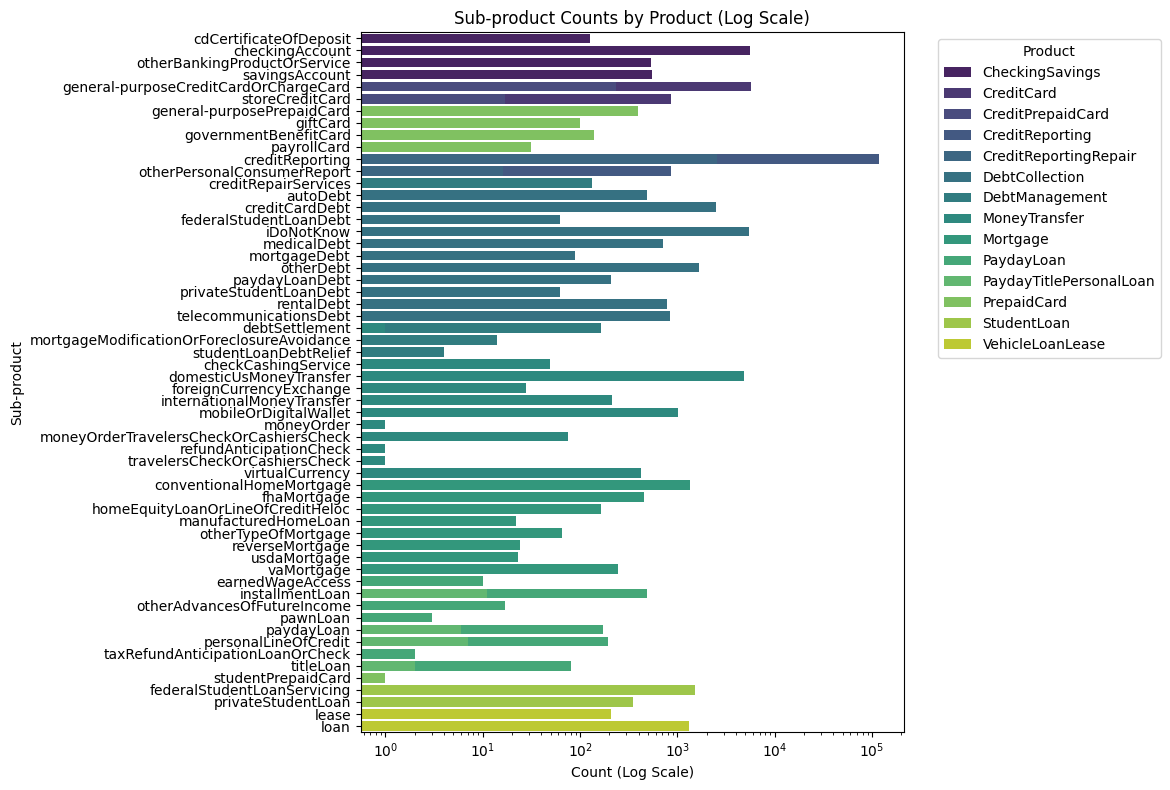

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single bar chart for all products and their sub-products
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.barplot(x='Count', y='Sub-product', hue='Product', data=product_subproduct_sampled_counts, palette='viridis', dodge=False)
plt.xscale('log') # Set x-axis to log scale
plt.title('Sub-product Counts by Product (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Sub-product')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-10927300.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Sub-product', data=product_subproducts_df, palette='viridis', ax=axes[i])
/tmp/ipython-input-10927300.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Sub-product', data=product_subproducts_df, palette='viridis', ax=axes[i])
/tmp/ipython-input-10927300.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Sub-product', data=product_subproducts_df, palette='viridis', ax=axes[i])
/tmp/ipython-input-10927300.py:28: Futur

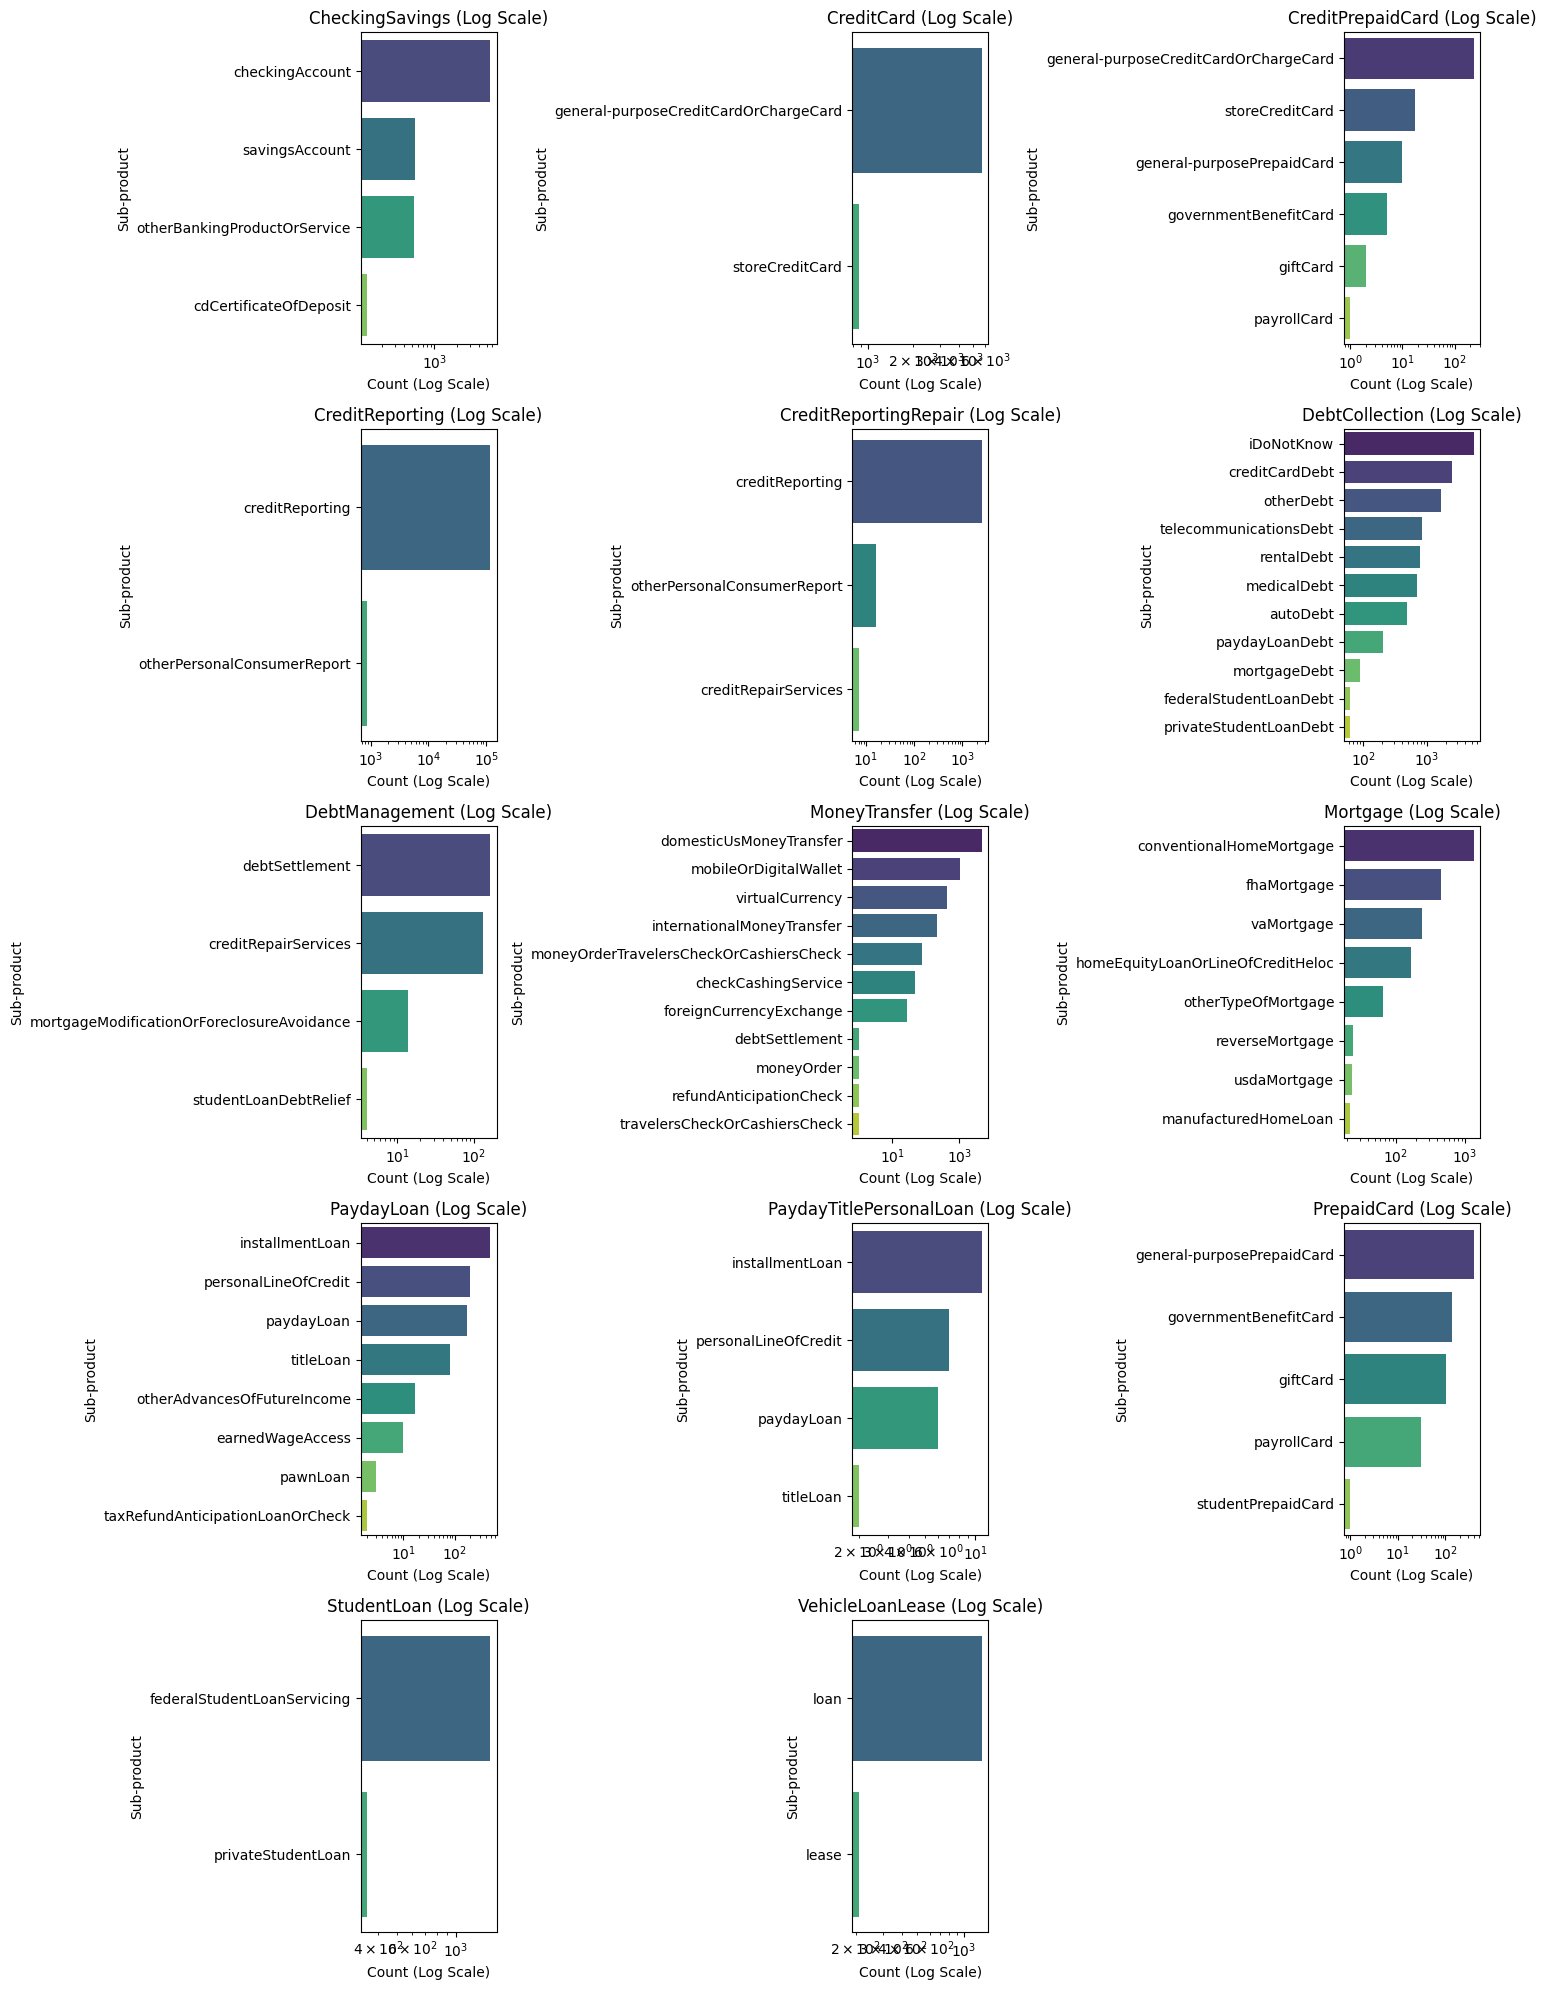

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get the list of unique products
unique_products = product_subproduct_sampled_counts['Product'].unique()

# Determine the number of rows and columns for subplots
n_products = len(unique_products)
n_cols = 3  # You can adjust the number of columns as needed
n_rows = math.ceil(n_products / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) # Adjust figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each product to create a separate bar chart for its sub-products
for i, product in enumerate(unique_products):
    # Filter the table for the current product
    product_subproducts_df = product_subproduct_sampled_counts[product_subproduct_sampled_counts['Product'] == product].copy()

    # Sort sub-products by count in descending order for better readability
    product_subproducts_df = product_subproducts_df.sort_values(by='Count', ascending=False)

    # Create a bar chart for sub-products on the current subplot
    sns.barplot(x='Count', y='Sub-product', data=product_subproducts_df, palette='viridis', ax=axes[i])
    axes[i].set_xscale('log') # Set x-axis to log scale
    axes[i].set_title(f'{product} (Log Scale)')
    axes[i].set_xlabel('Count (Log Scale)')
    axes[i].set_ylabel('Sub-product')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-3255051976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sampled_df_filtered_counts.values, y=sampled_df_filtered_counts.index, palette='viridis')


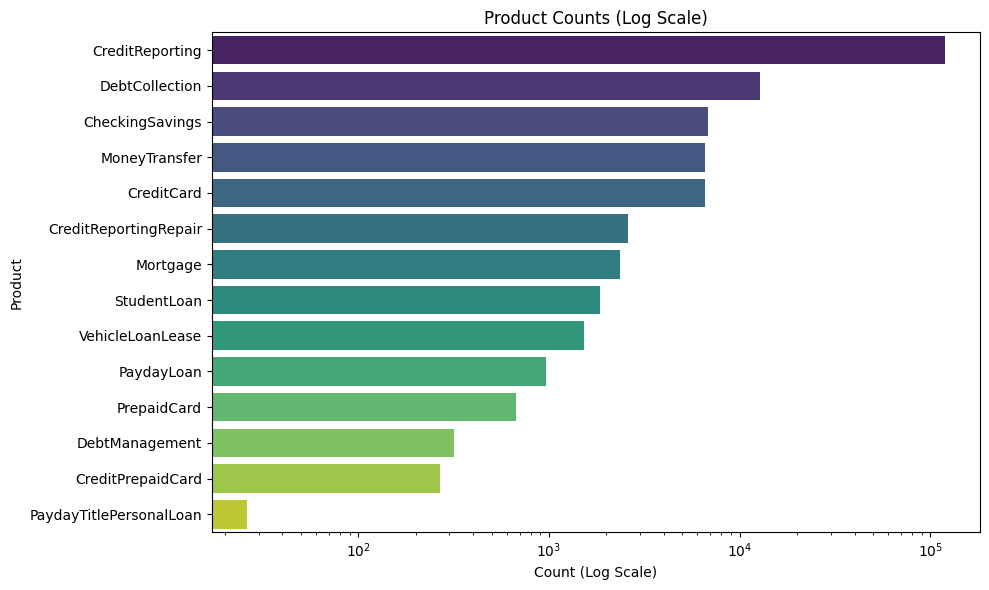

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for Product counts on a log scale
plt.figure(figsize=(10, 6))
sns.barplot(x=sampled_df_filtered_counts.values, y=sampled_df_filtered_counts.index, palette='viridis')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Product Counts (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [16]:
sampled_df_filtered.head()

,Consumer complaint narrative,Product,Sub-product
0,I was using Bread XXXX previously known as XXX...,CheckingSavings,cdCertificateOfDeposit
1,XXXX XXXX XXXX were presented by the XXXX hold...,CheckingSavings,cdCertificateOfDeposit
2,Complaint against NexBank This bank and its em...,CheckingSavings,cdCertificateOfDeposit
3,Chase Bank 9 month lock on a CD at 5 % equals ...,CheckingSavings,cdCertificateOfDeposit
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",CheckingSavings,cdCertificateOfDeposit


In [17]:
# Rename the columns in the DataFrame
sampled_df_filtered.rename(columns={
    'Consumer complaint narrative': 'consumer_complaint_narrative',
    'Product': 'product',
    'Sub-product': 'sub_product'
}, inplace=True)

# Display the columns to confirm the changes
print("Columns after renaming:")
display(sampled_df_filtered.columns)

Columns after renaming:


Index(['consumer_complaint_narrative', 'product', 'sub_product'], dtype='object')

In [18]:
sampled_df_filtered.head()

,consumer_complaint_narrative,product,sub_product
0,I was using Bread XXXX previously known as XXX...,CheckingSavings,cdCertificateOfDeposit
1,XXXX XXXX XXXX were presented by the XXXX hold...,CheckingSavings,cdCertificateOfDeposit
2,Complaint against NexBank This bank and its em...,CheckingSavings,cdCertificateOfDeposit
3,Chase Bank 9 month lock on a CD at 5 % equals ...,CheckingSavings,cdCertificateOfDeposit
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",CheckingSavings,cdCertificateOfDeposit


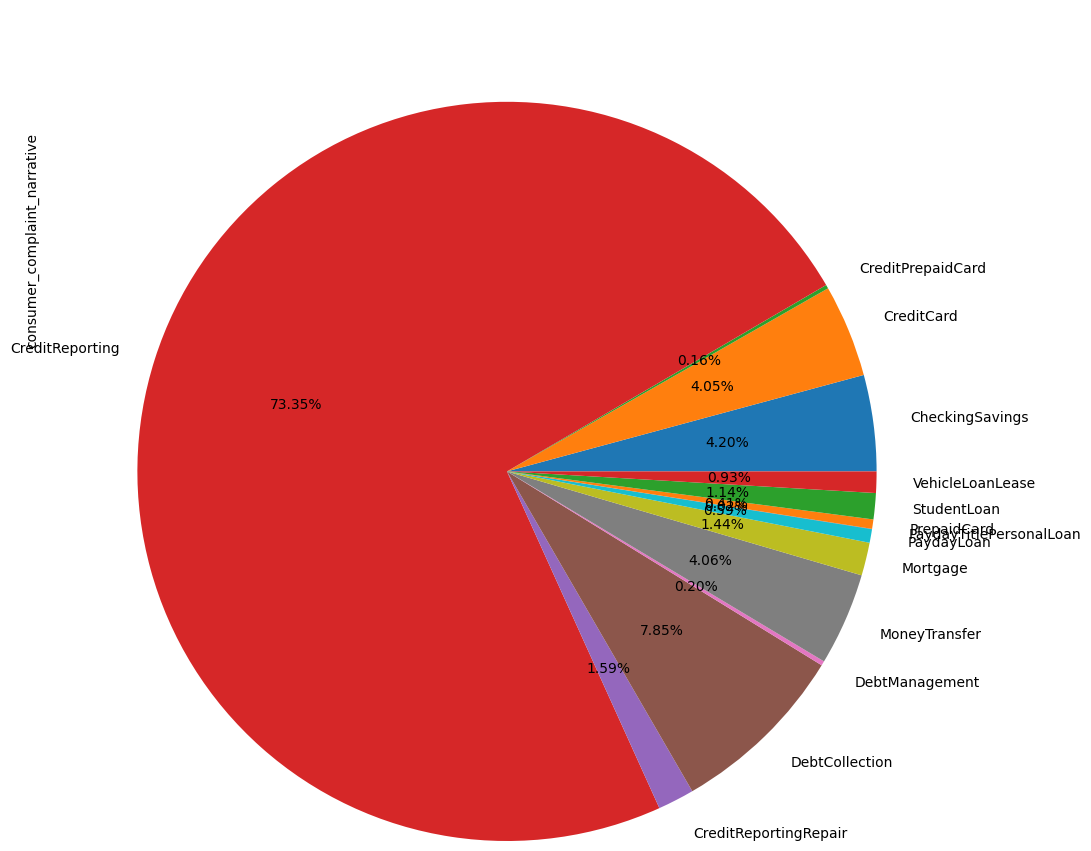

In [19]:
fig = plt.figure(figsize=(16,6))
sampled_df_filtered.groupby('product').consumer_complaint_narrative.count().plot.pie(ylim=0,autopct='%1.2f%%')
plt.show()

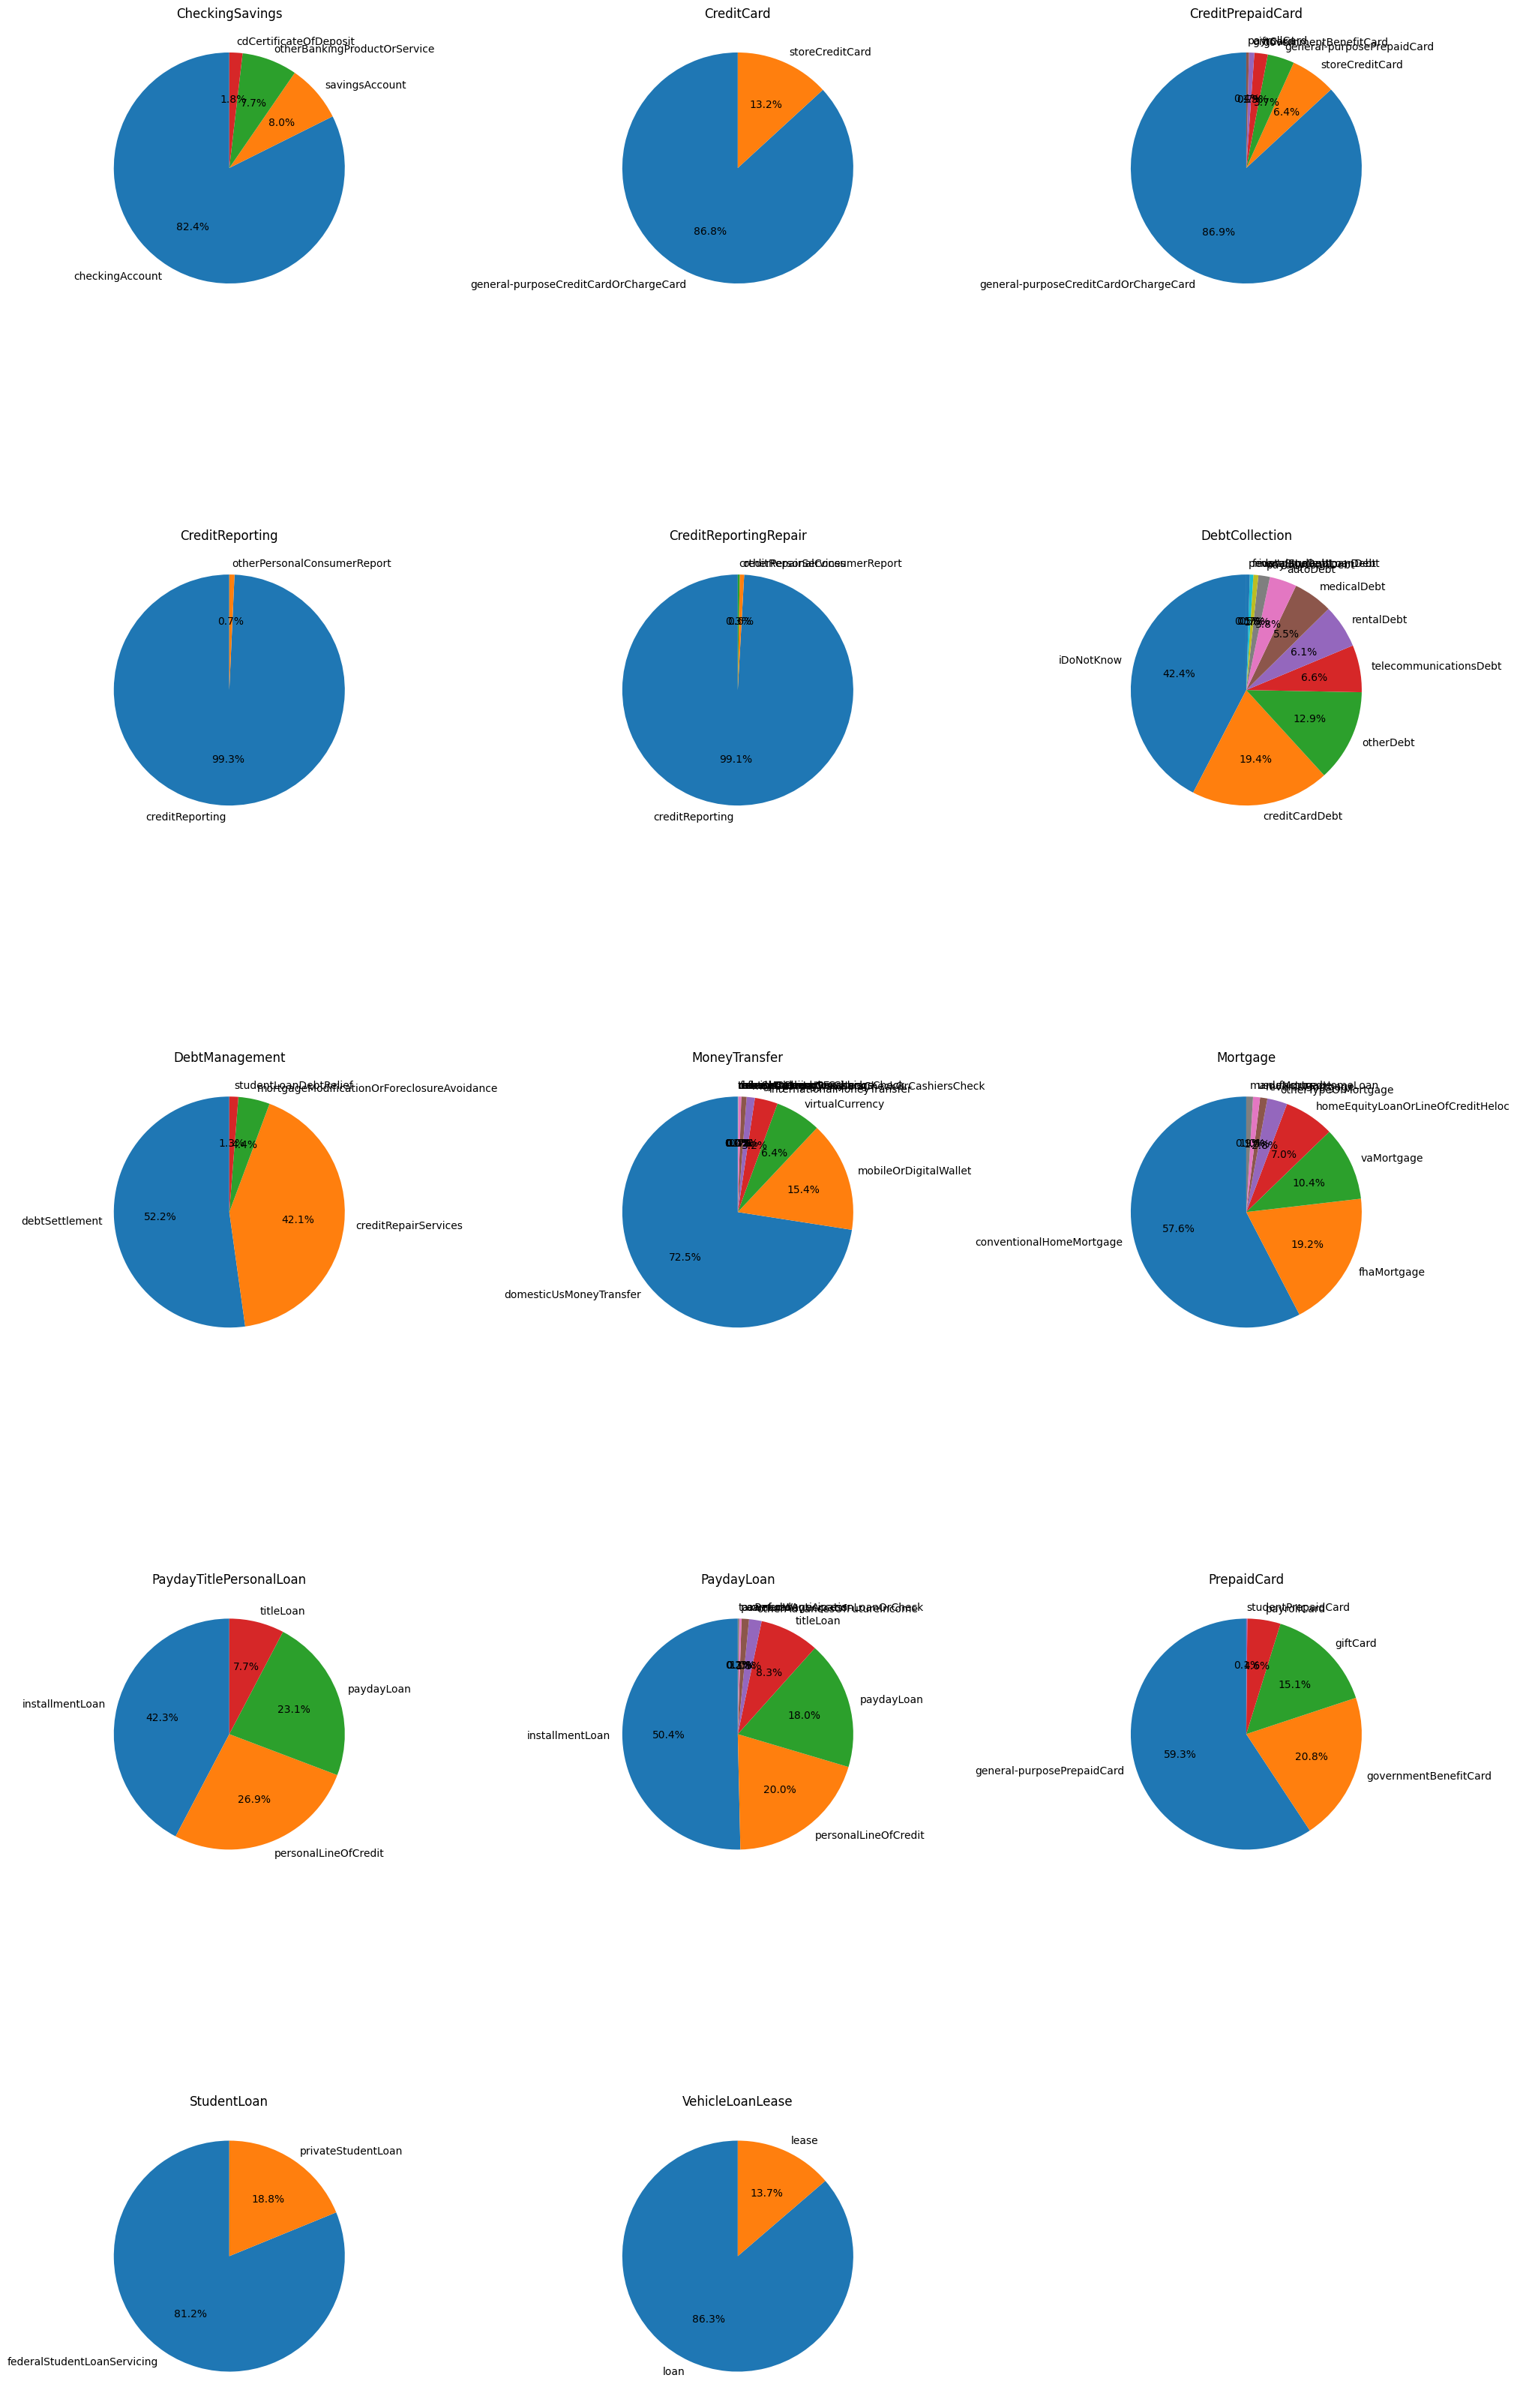

In [21]:
import matplotlib.pyplot as plt
import math

# Get the list of unique products
unique_products = sampled_df_filtered['product'].unique()

# Determine the number of rows and columns for subplots
n_products = len(unique_products)
n_cols = 3  # Number of columns for the pie charts (you can adjust this)
n_rows = math.ceil(n_products / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 7)) # Adjusted figure size here

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each product to create a separate pie chart for its sub-products
for i, product in enumerate(unique_products):
    # Filter the DataFrame for the current product
    product_df = sampled_df_filtered[sampled_df_filtered['product'] == product]

    # Group by sub_product and count occurrences
    subproduct_counts = product_df['sub_product'].value_counts()

    # Create a pie chart on the current subplot
    ax = axes[i]
    subproduct_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{product}')
    ax.set_ylabel('') # Hide the default y-label

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

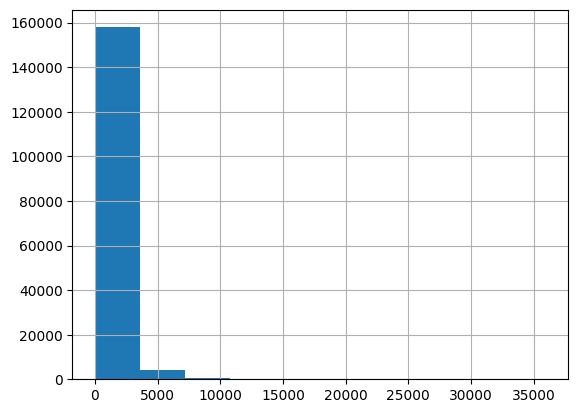

In [22]:
sampled_df_filtered['consumer_complaint_narrative'].str.len().hist()

### hisogram for complaint length on character level
## Inference
#### complaint length between 0 to 11000 characters, but most of the complaints from 0 to 5000

In [23]:
sampled_df_filtered[sampled_df_filtered['consumer_complaint_narrative'].str.len() < 15]

,consumer_complaint_narrative,product,sub_product
14290,See attached,CreditReporting,creditReporting
17121,identity theft,CreditReporting,creditReporting
38473,remove them.,CreditReporting,creditReporting
46154,XX/XX/XXXX,CreditReporting,creditReporting
49178,XX/XX/XXXX,CreditReporting,creditReporting
100055,Hard inquiries,CreditReporting,creditReporting
127457,XX/XX/XXXX,CreditReporting,creditReporting
127874,incorrect name,CreditReporting,creditReporting
134175,See attached,CreditReportingRepair,creditReporting
156610,see attachemnt,Mortgage,conventionalHomeMortgage


<Axes: >

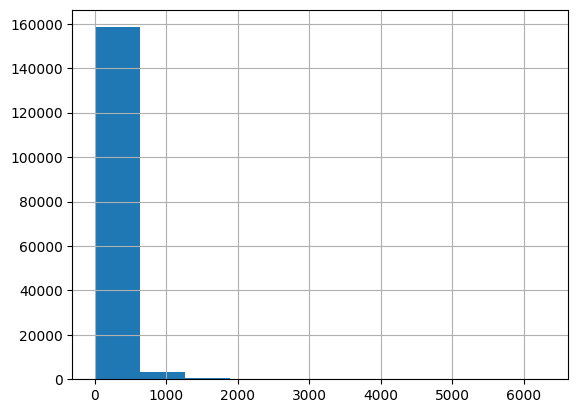

In [24]:
sampled_df_filtered['consumer_complaint_narrative'].str.split().map(lambda x: len(x)).hist()

### hisogram for complaint length on word level
## Inference
#### complaint length between 0 to ~2000 words, but most of the complaints from 0 to ~700 words

<Axes: >

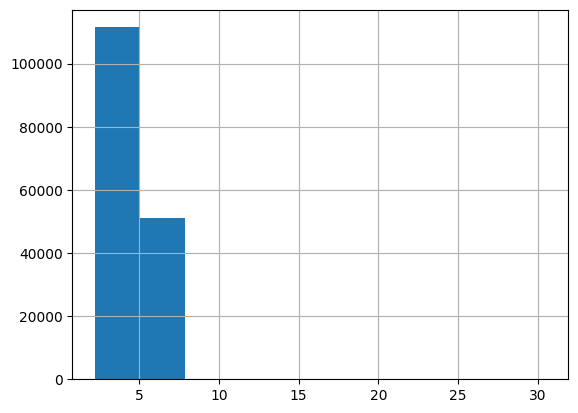

In [25]:
## average word length in each sentence
import numpy as np

sampled_df_filtered['consumer_complaint_narrative'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()


# The average word length ranges between 2 to 7 with 5 being the most common length.
# it mean that people are using really short words in complaints

In [11]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
corpus=[]
uscon_df_new= sampled_df_filtered['consumer_complaint_narrative'].str.split()
uscon_df_new=uscon_df_new.values.tolist()
corpus=[word for i in uscon_df_new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    uscon_df_new= text.str.split()
    uscon_df_new=uscon_df_new.values.tolist()
    corpus=[word for i in uscon_df_new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

In [31]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)

##sns.barplot(x=y,y=x)

<Axes: >

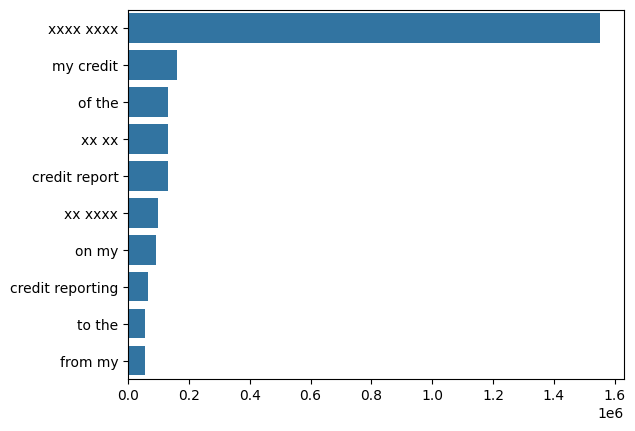

In [33]:
## bi-gram analysis
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(sampled_df_filtered['consumer_complaint_narrative'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<Axes: >

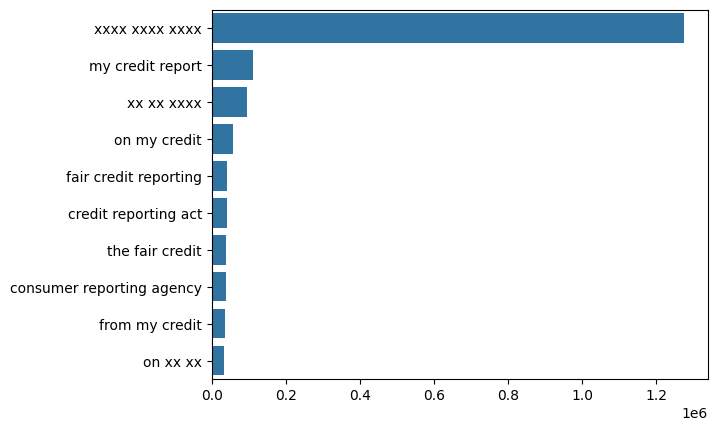

In [34]:
## tri-gram anaysis

top_tri_grams=get_top_ngram(sampled_df_filtered['consumer_complaint_narrative'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

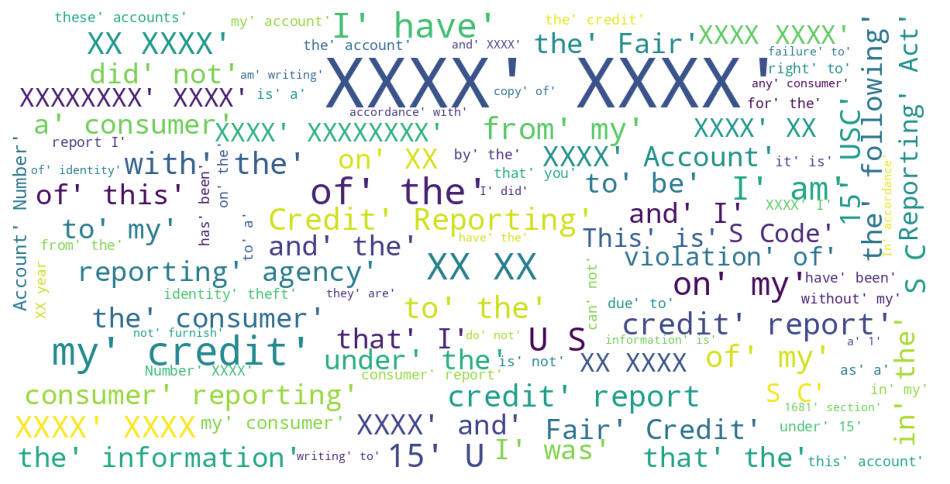

In [35]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)

In [36]:
# Export the filtered DataFrame to a CSV file
sampled_df_filtered.to_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/sample_complaints_2years_004.csv', index=False)

print("sample_complaints_2years_003.csv has been saved.")

sample_complaints_2years_003.csv has been saved.


In [1]:
import pandas as pd
sampled_df_filtered = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/sample_complaints_2years_004.csv')

In [2]:
sampled_df_filtered.head()

,consumer_complaint_narrative,product,sub_product
0,I was using Bread XXXX previously known as XXX...,CheckingSavings,cdCertificateOfDeposit
1,XXXX XXXX XXXX were presented by the XXXX hold...,CheckingSavings,cdCertificateOfDeposit
2,Complaint against NexBank This bank and its em...,CheckingSavings,cdCertificateOfDeposit
3,Chase Bank 9 month lock on a CD at 5 % equals ...,CheckingSavings,cdCertificateOfDeposit
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",CheckingSavings,cdCertificateOfDeposit


In [5]:
sampled_df_filtered_counts = sampled_df_filtered['product'].value_counts()
display(sampled_df_filtered_counts)

,count
product,
CreditReporting,119410
DebtCollection,12784
CheckingSavings,6841
MoneyTransfer,6603
CreditCard,6587
CreditReportingRepair,2594
Mortgage,2350
StudentLoan,1860
VehicleLoanLease,1519


In [37]:
# Get the top 10 products by count
top_10_products = sampled_df_filtered_counts.head(10).index.tolist()

# Filter the DataFrame to keep only the top 10 products
sampled_df_top_10_products = sampled_df_filtered[sampled_df_filtered['product'].isin(top_10_products)].copy()

# Display the shape of the new DataFrame
print(f"Shape of the DataFrame filtered for top 10 products: {sampled_df_top_10_products.shape}")

# Display the head of the new DataFrame
display(sampled_df_top_10_products.head())

Shape of the DataFrame filtered for top 10 products: (161511, 3)


,consumer_complaint_narrative,product,sub_product
0,I was using Bread XXXX previously known as XXX...,CheckingSavings,cdCertificateOfDeposit
1,XXXX XXXX XXXX were presented by the XXXX hold...,CheckingSavings,cdCertificateOfDeposit
2,Complaint against NexBank This bank and its em...,CheckingSavings,cdCertificateOfDeposit
3,Chase Bank 9 month lock on a CD at 5 % equals ...,CheckingSavings,cdCertificateOfDeposit
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",CheckingSavings,cdCertificateOfDeposit


In [38]:
sampled_df_filtered_top10_counts = sampled_df_top_10_products['product'].value_counts()
display(sampled_df_filtered_top10_counts)

,count
product,
CreditReporting,119410
DebtCollection,12784
CheckingSavings,6841
MoneyTransfer,6603
CreditCard,6587
CreditReportingRepair,2594
Mortgage,2350
StudentLoan,1860
VehicleLoanLease,1519


In [50]:
uscon_df = sampled_df_top_10_products.copy()

In [51]:
uscon_df.head()

,consumer_complaint_narrative,product,sub_product
0,I was using Bread XXXX previously known as XXX...,CheckingSavings,cdCertificateOfDeposit
1,XXXX XXXX XXXX were presented by the XXXX hold...,CheckingSavings,cdCertificateOfDeposit
2,Complaint against NexBank This bank and its em...,CheckingSavings,cdCertificateOfDeposit
3,Chase Bank 9 month lock on a CD at 5 % equals ...,CheckingSavings,cdCertificateOfDeposit
4,"Since XXXX of XX/XX/2024, Synchrony bank has b...",CheckingSavings,cdCertificateOfDeposit


### Text Preprocessing

Now, let's perform the requested text preprocessing steps on the 'Consumer complaint narrative' column.

In [8]:
%pip install nltk pandas seaborn matplotlib

In [52]:
uscon_df['sub_product'] = uscon_df['sub_product'].astype(str)
uscon_df['product'] = uscon_df['product'].astype(str)
uscon_df['consumer_complaint_narrative'] = uscon_df['consumer_complaint_narrative'].astype(str)

In [53]:
## Removing all the stop words of english, special characters etc.

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_!<>*~$%^&()-=]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:3: SyntaxWarning: invalid escape sequence '\['
/tmp/ipython-input-1345659665.py:3: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')


In [54]:
## Apply clean_text functiona
uscon_df['consumer_complaint_narrative'] = uscon_df['consumer_complaint_narrative'].apply(clean_text)

In [55]:
## remove all the numbers
uscon_df['consumer_complaint_narrative'] = uscon_df['consumer_complaint_narrative'].str.replace('[0-9]+', ' ', regex=True)

In [56]:
uscon_df.head()

,consumer_complaint_narrative,product,sub_product
0,using bread xxxx previously known xxxx xxxx xx...,CheckingSavings,cdCertificateOfDeposit
1,xxxx xxxx xxxx presented xxxx holders huntingt...,CheckingSavings,cdCertificateOfDeposit
2,complaint nexbank bank employees purposely fol...,CheckingSavings,cdCertificateOfDeposit
3,chase bank month lock cd % equals $ . . c...,CheckingSavings,cdCertificateOfDeposit
4,since xxxx xx xx synchrony bank giving runar...,CheckingSavings,cdCertificateOfDeposit


In [57]:
lstOfJunkCharacters = ['#','xxxx','xx xx xxxx','xx xx','xx','$','%','xxxx xxxx','xx xx','xxxx and','xx xxxx','on xxxx','.']

for stchr in lstOfJunkCharacters:
    uscon_df['consumer_complaint_narrative'] = uscon_df['consumer_complaint_narrative'].str.replace(stchr,' ')

In [58]:
uscon_df.head()

,consumer_complaint_narrative,product,sub_product
0,using bread previously known cd sup...,CheckingSavings,cdCertificateOfDeposit
1,presented holders huntington bank ...,CheckingSavings,cdCertificateOfDeposit
2,complaint nexbank bank employees purposely fol...,CheckingSavings,cdCertificateOfDeposit
3,chase bank month lock cd equals c...,CheckingSavings,cdCertificateOfDeposit
4,since synchrony bank giving runaround gi...,CheckingSavings,cdCertificateOfDeposit


In [59]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if isinstance(text, str):
        words = text.split()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)
    return ""

uscon_df['consumer_complaint_narrative'] = uscon_df['consumer_complaint_narrative'].apply(lemmatize_text)

print("Lemmatization applied to 'consumer_complaint_narrative' column.")
display(uscon_df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatization applied to 'consumer_complaint_narrative' column.


,consumer_complaint_narrative,product,sub_product
0,using bread previously known cd supposed matur...,CheckingSavings,cdCertificateOfDeposit
1,presented holder huntington bank mi opened set...,CheckingSavings,cdCertificateOfDeposit
2,complaint nexbank bank employee purposely foll...,CheckingSavings,cdCertificateOfDeposit
3,chase bank month lock cd equal coming maturity...,CheckingSavings,cdCertificateOfDeposit
4,since synchrony bank giving runaround giving a...,CheckingSavings,cdCertificateOfDeposit


In [64]:
# Remove rows where 'consumer_complaint_narrative' is null, blank, or empty
uscon_df = uscon_df[uscon_df['consumer_complaint_narrative'].str.strip().astype(bool)]

# Display the shape of the DataFrame after removing rows
print(f"Shape of the DataFrame after removing null, blank, or empty narratives: {uscon_df.shape}")

# Display the head of the cleaned DataFrame
display(uscon_df.head())

Shape of the DataFrame after removing null, blank, or empty narratives: (161446, 3)


,consumer_complaint_narrative,product,sub_product
0,using bread previously known cd supposed matur...,CheckingSavings,cdCertificateOfDeposit
1,presented holder huntington bank mi opened set...,CheckingSavings,cdCertificateOfDeposit
2,complaint nexbank bank employee purposely foll...,CheckingSavings,cdCertificateOfDeposit
3,chase bank month lock cd equal coming maturity...,CheckingSavings,cdCertificateOfDeposit
4,since synchrony bank giving runaround giving a...,CheckingSavings,cdCertificateOfDeposit


In [65]:
uscon_df.shape

(161446, 3)

In [66]:
# Export the filtered DataFrame to a CSV file
uscon_df.to_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/sample_complaints_2years_005.csv', index=False)

print("sample_complaints_2years_005.csv has been saved.")

sample_complaints_2years_005.csv has been saved.


# Exporatory Data Analysis after Data Cleaning


<Axes: >

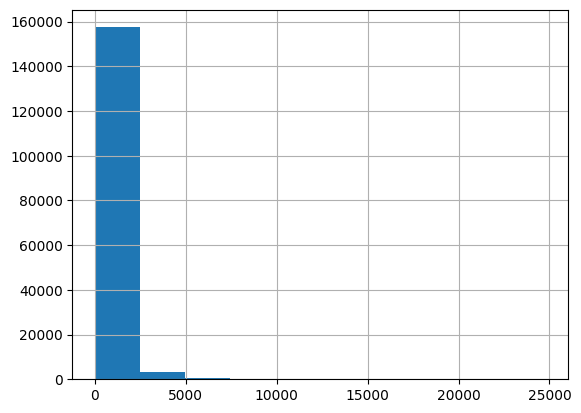

In [67]:
uscon_df['consumer_complaint_narrative'].str.len().hist()

### hisogram for complaint length on character level
## Inference
#### complaint length between 0 to 11000 characters, but most of the complaints from 0 to 5000

In [68]:
uscon_df[uscon_df['consumer_complaint_narrative'].str.len() < 15]

,consumer_complaint_narrative,product,sub_product
101,address ok,CheckingSavings,cdCertificateOfDeposit
7328,authorize,CreditCard,general-purposeCreditCardOrChargeCard
14290,see attached,CreditReporting,creditReporting
17121,identity theft,CreditReporting,creditReporting
17292,pro bank,CreditReporting,creditReporting
...,...,...,...
145956,account,DebtCollection,otherDebt
146320,debt belong me,DebtCollection,otherDebt
146402,owe money,DebtCollection,otherDebt
156610,see attachemnt,Mortgage,conventionalHomeMortgage


<Axes: >

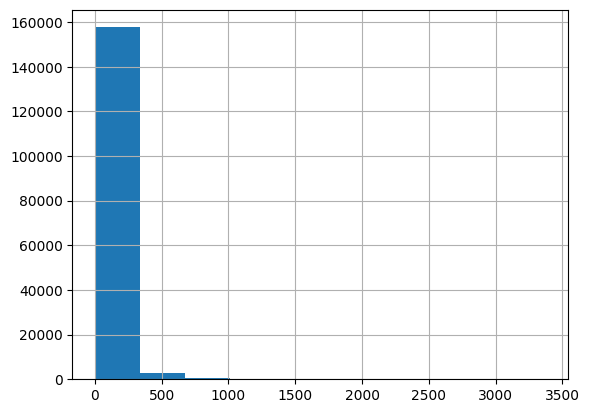

In [71]:
uscon_df['consumer_complaint_narrative'].str.split().map(lambda x: len(x)).hist()

### hisogram for complaint length on word level
## Inference
#### complaint length between 0 to ~1000 words, but most of the complaints from 0 to ~500 words

<Axes: >

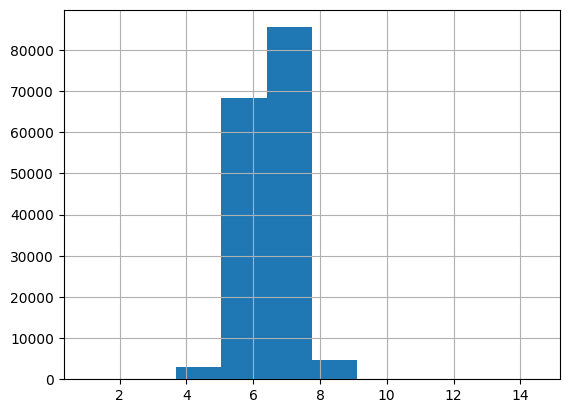

In [73]:
## average word length in each sentence
import numpy as np

uscon_df['consumer_complaint_narrative'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()


# The average word length ranges between 2 to 7 with 5 being the most common length.
# it mean that people are using really short words in complaints

In [80]:
corpus=[]
uscon_df_new= uscon_df['consumer_complaint_narrative'].str.split()
uscon_df_new=uscon_df_new.values.tolist()
corpus=[word for i in uscon_df_new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    uscon_df_new= text.str.split()
    uscon_df_new=uscon_df_new.values.tolist()
    corpus=[word for i in uscon_df_new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)

##sns.barplot(x=y,y=x)

<Axes: >

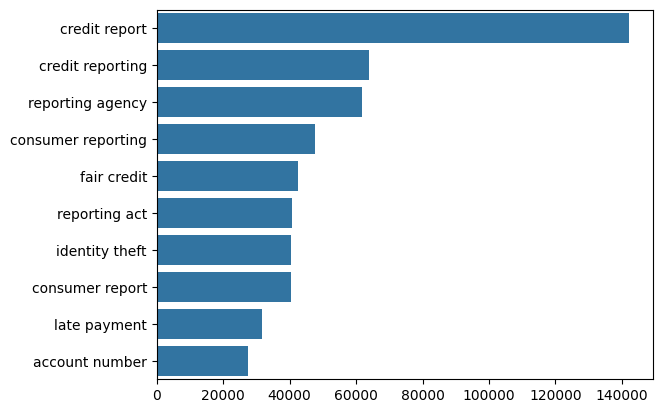

In [76]:
## bi-gram analysis
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(uscon_df['consumer_complaint_narrative'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

### Inference
# Data is not looking clean for modelling without any stop words, junk characters etc.

<Axes: >

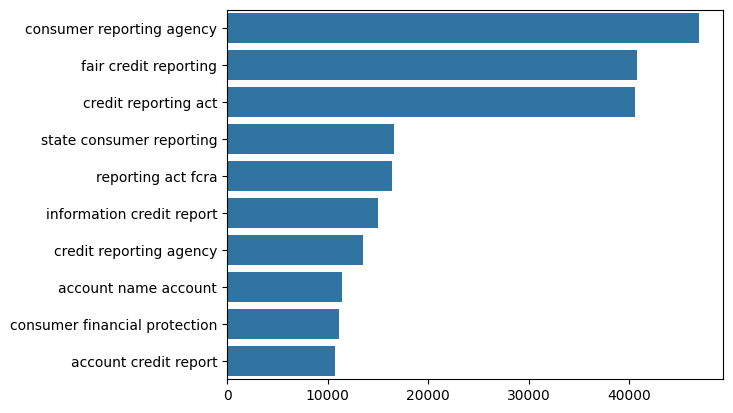

In [77]:
## tri-gram anaysis

top_tri_grams=get_top_ngram(uscon_df['consumer_complaint_narrative'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

### Inference
# Data is not looking clean for modelling without any stop words, junk characters etc.

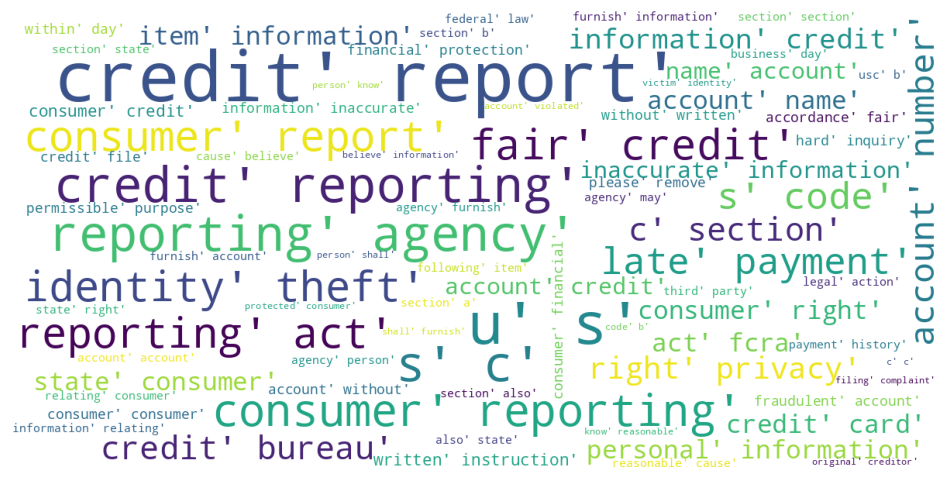

In [81]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)

### Inference
# Word Cloud looking clean and good for modelling without any stop words, junk characters etc.